In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set()

In [3]:
train_df = pd.read_csv('train.csv', index_col = 0)


# Description

In [4]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# #Missing Values


(19,)

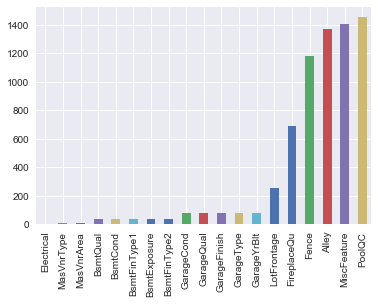

In [8]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
missing.shape

# Sale Price Comparision & Log-transformation with right skewed data

/Users/daywalker/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[10, 14, 0, 180]

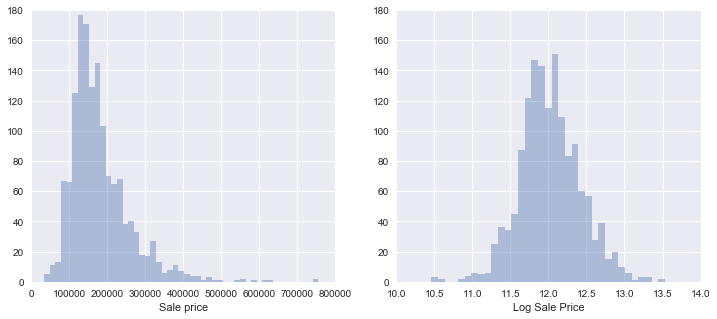

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(train_df.SalePrice,kde=False)
plt.xlabel('Sale price')
plt.axis([0,800000,0,180])
plt.subplot(122)
sns.distplot(np.log1p(train_df["SalePrice"]),kde=False)
plt.xlabel('Log Sale Price')
plt.axis([10,14,0,180])

# Log transformation

In [11]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

In [ ]:
def transform_housing_data(df):
    """General data-conditioning function to prepare the housing DataFrame for
    analysis. Mostly NaN filling.
    Based on : https://www.kaggle.com/sdevan/top-25-with-ridge-detailed-eda-and-data-cleaning
    """

    fillnone = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
                'MasVnrType']

    fillzero = ['GarageArea', 'TotalBsmtSF', 'LotFrontage', 'MasVnrArea',
                'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

    fillmode = ['Electrical', 'KitchenQual', 'SaleType', 'Exterior1st',
                'Exterior2nd', 'Functional', 'MasVnrType', 'MSZoning']

    # has some NaNs. Value is highly correlated with YearBuilt
    df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

    # There seems to be an erroneous value for GarageYrBlt of 2207
    # Based on the YearBuilt being 2006, I assume it should be 2007
    df.loc[df.GarageYrBlt == 2207.0, 'GarageYrBlt'] = 2007.0

    # Convert column to strings. It's categorical data stored as int64
    df['MSSubClass'] = df['MSSubClass'].astype(str)

    # Really only one value present
    df.drop(['Utilities'], axis=1, inplace=True)

    # Apparently this can't be done without looping.
    for colname in fillnone:
        df[colname].fillna('none', inplace=True)

    for colname in fillzero:
        df[colname].fillna(0, inplace=True)

    for colname in fillmode:
        df[colname].fillna(df[colname].mode()[0], inplace=True)
    
    categorical_cols = df.columns[df.dtypes == 'object']
    
    for c in categorical_cols:
        lbl = LabelEncoder() 
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
    
    return df

In [ ]:
def plot_correlation():
    corr = train_df.corr()

    # mask = np.zeros_like(corr, dtype=np.bool)
    # mask[np.triu_indices_from(mask)] = True

    # # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    print('Number of features:{}/{}'.format(len(corr.index), len(train_df.columns)))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, vmax=.8, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    

In [12]:
def plot_missing():
    try:
        cols = corr.index
        missing_data = (train_df[cols].isnull().sum() / len(train_df[cols])) * 100
        missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'MissingPct':missing_data})

        f, ax = plt.subplots(figsize=(8, 6))
        plt.xticks(rotation='90')
        sns.barplot(x=missing_data.index, y=missing_data.MissingPct)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
    except:
        print('No missing data available')

Number of features:37/80
No missing data available


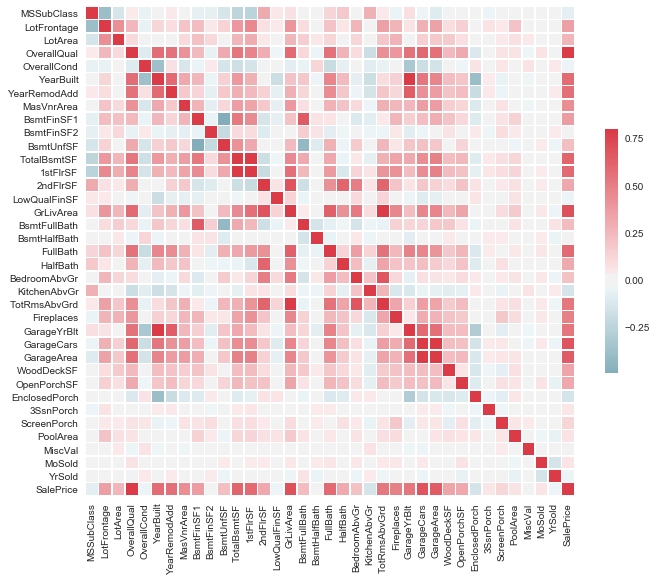

In [13]:
plot_correlation()
plot_missing()


In [14]:
train_df = transform_housing_data(train_df)

Number of features:79/79


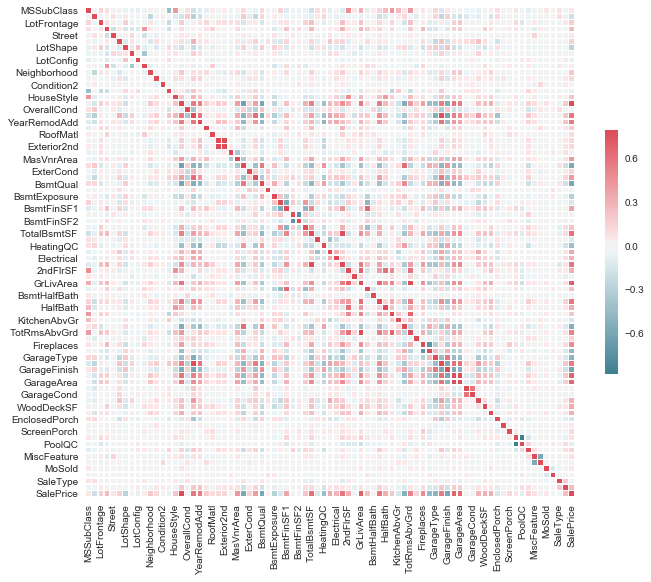

In [15]:
plot_correlation()

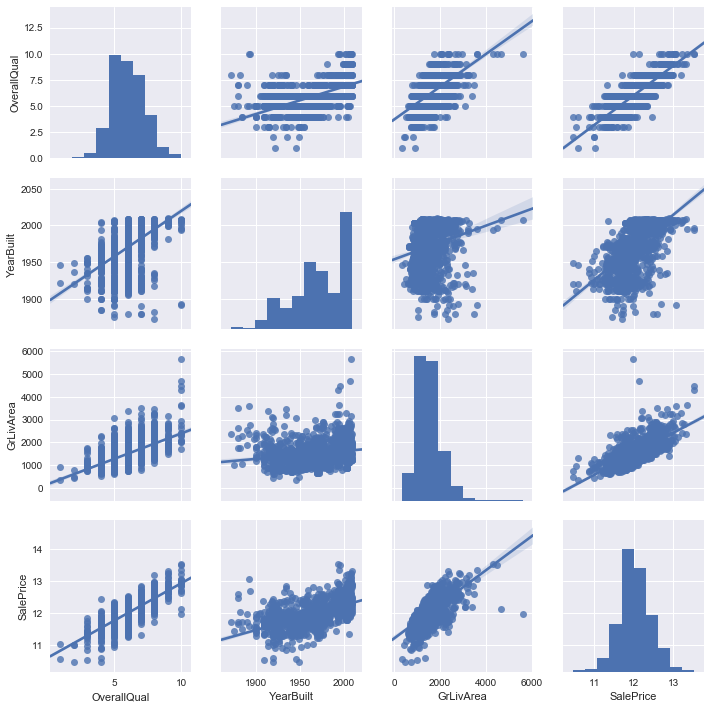

In [18]:
sns.pairplot(train_df[['OverallQual','YearBuilt','GrLivArea','SalePrice']], kind='reg')


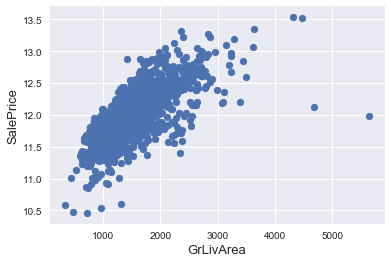

In [19]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Regression using Machine Learning Models

In [100]:
## training data
x = train_df.loc[:, train_df.columns != 'SalePrice']
y = train_df['SalePrice']

In [84]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Scaling the data

In [55]:
std_sclr = StandardScaler()
x_std = std_sclr.fit_transform(x)
y_int = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(x_std, y_int, test_size=0.3,random_state=42)

# Evaluation Metric: RMSE

In [56]:
scorer = make_scorer(mean_squared_error,greater_is_better=False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

# Linear Regression

In [57]:
model = LinearRegression()
model.fit(X_train,y_train)

print('RMSE on training set:',rmse_cv_train(model).mean())
print('RMSE on test set:',rmse_cv_test(model).mean())



RMSE on training set: 0.35672237963340575
RMSE on test set: 127408861480.33904


# Ridge

In [58]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)


Best alpha : 60.0


In [59]:
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 84.0


In [60]:
print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())

Ridge RMSE on Training set : 0.32160171988467273
Ridge RMSE on Test set : 0.27978570591698937


# feature importances by Ridge

ridge picked 78 features and eliminated the other 0 features


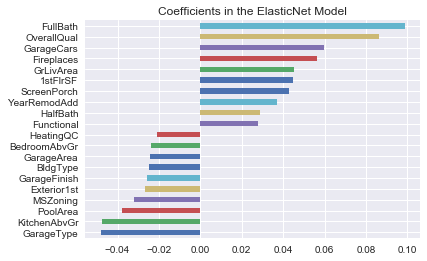

In [96]:
coefs = pd.Series(ridge.coef_, index = x.columns)
print("ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

# Lasso

In [79]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)


Best alpha : 0.01


In [80]:
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.013000000000000001


In [82]:
print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())

Lasso RMSE on Training set : 0.31560984869134334
Lasso RMSE on Test set : 0.28015817855586833


lasso picked 34 features and eliminated the other 44 features


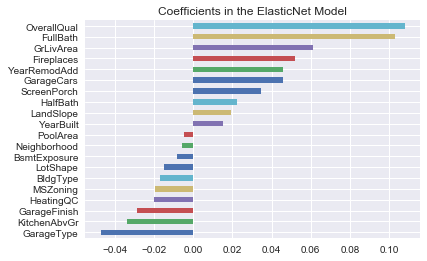

In [97]:
coefs = pd.Series(lasso.coef_, index = x.columns)
print("lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

# ElaticNet

In [85]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.5
Best alpha : 0.03


In [86]:
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.425
Best alpha : 0.03


In [87]:
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.425
Best alpha : 0.03


In [88]:
print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())

ElasticNet RMSE on Training set : 0.31522695854231364
ElasticNet RMSE on Test set : 0.2798271122738812


ElasticNet picked 34 features and eliminated the other 44 features


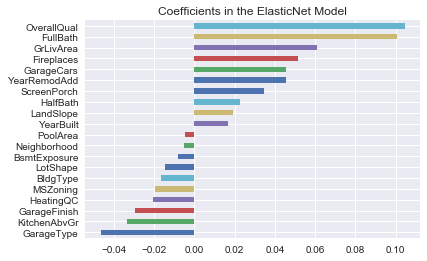

In [108]:
coefs = pd.Series(elasticNet.coef_, index = x.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [128]:
# working on the ElasticNet features
elastic_coefs = pd.DataFrame(data=elasticNet.coef_, columns=['coeff'])

In [129]:
elastic_coefs['features'] = x.columns

In [130]:
elastic_coefs.head(3)

,coeff,features
0,0.004173,MSSubClass
1,-0.019401,MSZoning
2,-0.000000,LotFrontage


In [132]:
elastic_coefs = elastic_coefs[elastic_coefs.coeff!=0]

In [137]:
## new training set
x_new = train_df[elastic_coefs.features]

X_train,X_test,y_train,y_test = train_test_split(x_new,y,test_size=0.3,random_state=42)

# Elastic Net on new features

In [138]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.5
Best alpha : 0.003


In [139]:
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.45
Best alpha : 0.003


In [140]:
print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())

ElasticNet RMSE on Training set : 0.16571572247089822
ElasticNet RMSE on Test set : 0.1486686664081856


# Lasso on New Features